<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week1/week1_video_adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동영상을 opencv로 편집하기 예제
- colab에서는 imshow를 이용해서 동영상 출력 못한다.
- mp4파일 읽기 -> 편집 -> 편집한 내용 mp4로 저장의 순서를 해야될 것으로 보인다
- 그러나 편집한 내용을 colab에서 mp4로 저장시 video저장이 제대로 안 된다.


재생할 파일 넓이, 높이, 프레임수: 1280, 720, 24


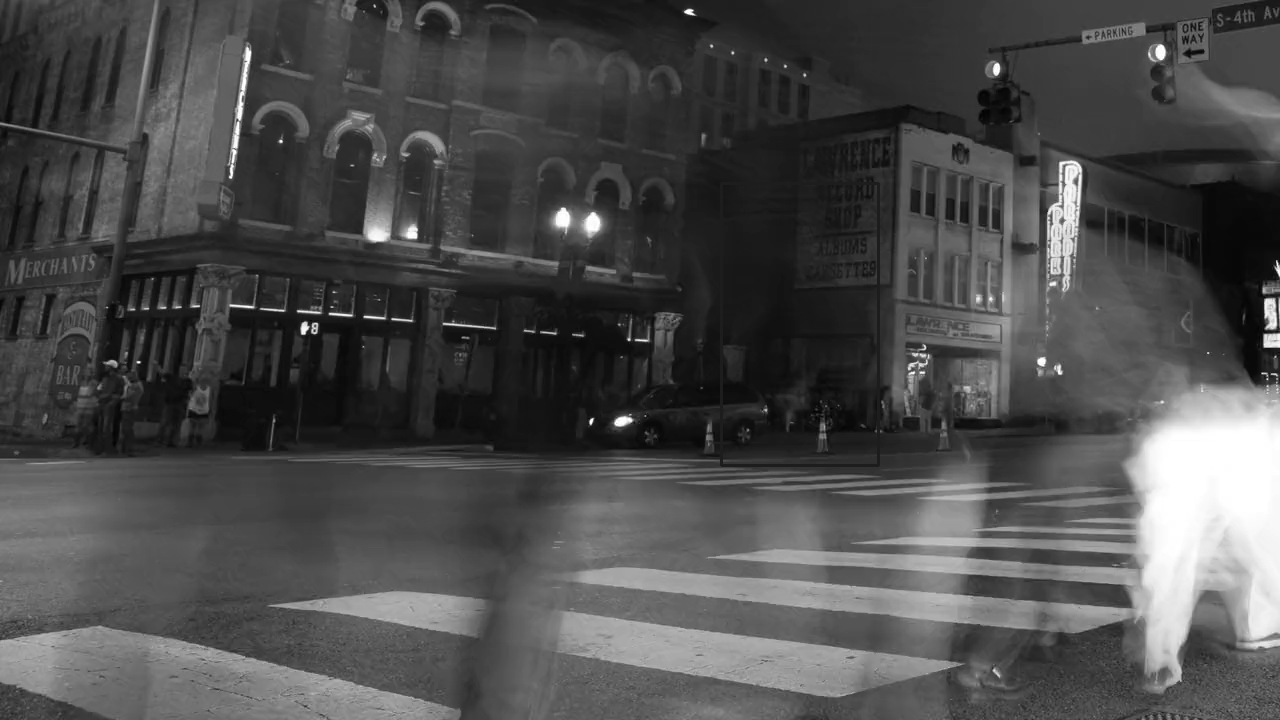

ret of cap is False: 145


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('04.mp4')

# 재생할 파일의 넓이와 높이
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2. CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS)
print('재생할 파일 넓이, 높이, 프레임수: %d, %d, %d'%(width, height, fps) )

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, int(fps), (int(width), int(height)))

i=0
while True:
  ret, img = cap.read()
  i=i+1
  if ret == False:
    print('ret of cap is False: '+ str(i))
    break

  cv2.rectangle(img, pt1=(721,183), pt2=(878,465), color=(255,0,), thickness=2)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #img = cv2.resize(img, dsize=(640,360))

  #이미지 자르기
  #img=img[100:200, 150:250]

  if i==1:
    cv2_imshow(img)
  out.write(img)
	
  #if cv2.waitKey(100) == ord('q'):
    #break

cap.release()
out.release()

## colab에서 동영상 출력하기

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)